In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

In [2]:
charge = pd.read_csv('/Users/jaypalamand/Desktop/ME597/Data/B0005_charge.csv')
charge

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity,SOC_CC,SOH
0,1,24,2008-04-02 16:37:51,3.325055,0.000302,29.341851,-0.002,0.003,0.000,1.846327,0.000000,0.923164
1,1,24,2008-04-02 16:37:51,3.001951,-3.361983,29.335723,-3.370,1.414,2.516,1.846327,0.000000,0.923164
2,1,24,2008-04-02 16:37:51,3.434644,1.508670,29.334717,1.498,4.142,5.500,1.846327,0.000677,0.923164
3,1,24,2008-04-02 16:37:51,3.454857,1.510043,29.341949,1.498,4.180,8.391,1.846327,0.001334,0.923164
4,1,24,2008-04-02 16:37:51,3.468788,1.508704,29.331462,1.498,4.196,11.266,1.846327,0.001987,0.923164
...,...,...,...,...,...,...,...,...,...,...,...,...
540374,168,24,2008-05-27 17:53:59,4.207020,0.035803,25.049182,0.031,4.240,10200.812,1.325079,0.995135,0.662540
540375,168,24,2008-05-27 17:53:59,4.207059,0.030939,25.026737,0.031,4.240,10203.687,1.325079,0.995154,0.662540
540376,168,24,2008-05-27 17:53:59,4.207501,0.027088,25.044500,0.031,4.240,10206.578,1.325079,0.995170,0.662540
540377,168,24,2008-05-27 17:53:59,4.206971,0.019631,25.035351,0.031,4.240,10209.406,1.325079,0.995182,0.662540


In [3]:
discharge = pd.read_csv('/Users/jaypalamand/Desktop/ME597/Data/B0005_discharge.csv')
discharge

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SOC_CC,SOH
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.000000,0.928244
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,0.999996,0.928244
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,0.994298,0.928244
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,0.988851,0.928244
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,0.983392,0.928244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,0.000002,0.662540
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,0.000000,0.662540
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,0.000000,0.662540
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,0.000003,0.662540


In [4]:
import pandas as pd

results = []

for cycle in charge['cycle'].unique():
    cycle_data = charge[charge['cycle'] == cycle]
    
    # Finding the row where voltage first reaches 4.2V
    cc_end_idx = cycle_data[cycle_data['voltage_measured'] >= 4.2000].index.min()
    
    if pd.notnull(cc_end_idx):
        # Time at which CC ends and CV begins
        cc_end_time = cycle_data.loc[cc_end_idx, 'time']
        
        # CC start is assumed to be at the beginning of the cycle
        cc_start_time = cycle_data['time'].min()
        
        # CV ends at the end of the cycle
        cv_end_time = cycle_data['time'].max()
        
        # Calculating constant current and constant voltage times
        constant_current_time = cc_end_time - cc_start_time
        constant_voltage_time = cv_end_time - cc_end_time
        avg_temp = cycle_data['temperature_measured'].mean()
        
        # Extracting the datetime for the cycle, assuming it's the same for all entries
        time_charge = cycle_data['datetime'].iloc[0]
        
        results.append({
            'cycle': cycle,
            'constant_current_time': constant_current_time,
            'constant_voltage_time': constant_voltage_time,
            'avg_temp_charge': avg_temp,
            'time_charge': time_charge  # Adding the datetime to the results
        })

# Creating a new DataFrame with the results
results_df = pd.DataFrame(results)

In [5]:
results_df


,cycle,constant_current_time,constant_voltage_time,avg_temp_charge,time_charge
0,1,3241.797,7274.203,26.635623,2008-04-02 16:37:51
1,2,3238.719,7245.828,26.778176,2008-04-02 20:55:40
2,3,3229.203,7168.687,26.703204,2008-04-03 01:12:38
3,4,3228.218,7266.985,26.617004,2008-04-03 05:27:49
4,5,3229.438,7563.234,26.518495,2008-04-03 09:44:35
...,...,...,...,...,...
163,164,1559.469,8594.625,25.476140,2008-05-26 07:21:44
164,165,1547.125,8769.781,25.506487,2008-05-26 12:05:07
165,166,1536.906,9034.484,25.517453,2008-05-26 16:51:13
166,167,1535.297,8357.078,25.664855,2008-05-26 21:41:33


In [6]:
import numpy as np
import pandas as pd

def moving_average(voltages, window_size):
    # Extend the edges to minimize edge effects
    extended_voltages = np.pad(voltages, (window_size//2, window_size-1-window_size//2), mode='edge')
    return np.convolve(extended_voltages, np.ones(window_size) / window_size, mode='valid')

cycle_dvd_soh_temp_time = {}  # Dictionary to store cycle, DVD, SOH, average temperature, discharge time, and discharge datetime

# Iterate over each unique cycle
for cycle in discharge['cycle'].unique():
    # Extract data for the cycle
    cycle_data = discharge[discharge['cycle'] == cycle]
    
    # Extract voltage measurements, SOH, temperature, time, and datetime for the cycle
    cycle_voltages = cycle_data['voltage_measured']
    cycle_capacity = cycle_data['capacity'].iloc[0]
    cycle_temps = cycle_data['temperature_measured']
    cycle_times = cycle_data['time']
    cycle_datetime = cycle_data['datetime'].iloc[0]

    # Calculate the average temperature during the discharge for the cycle
    average_temp_discharge = cycle_temps.mean()

    # Apply the moving average filter to smooth the voltage data
    smoothed_voltages = moving_average(cycle_voltages.values, window_size=5)
    
    # Calculate the absolute differences between consecutive smoothed readings and sum them
    dvd = np.sum(np.abs(np.diff(smoothed_voltages)))

    # Find the times when the voltage drops through 4.0V and 3.5V
    time_at_4_0 = cycle_times[cycle_voltages[cycle_voltages >= 4.0].index[-1]] if not cycle_voltages[cycle_voltages >= 4.0].empty else np.nan
    time_at_3_5 = cycle_times[cycle_voltages[cycle_voltages <= 3.5].index[0]] if not cycle_voltages[cycle_voltages <= 3.5].empty else np.nan
    
    # Calculate the time to discharge from 4.0V to 3.5V
    time_to_discharge = time_at_3_5 - time_at_4_0 if not np.isnan(time_at_4_0) and not np.isnan(time_at_3_5) else np.nan

    # TVE calculations:
    V_max = np.max(cycle_voltages)
    V_min = np.min(cycle_voltages)
    T_max = np.max(cycle_temps)
    T_min = np.min(cycle_temps)
    VE = (V_max - V_min) / V_max if V_max != 0 else 0
    TE = (T_max - T_min) / T_max if T_max != 0 else 0
    TVE = VE / TE if TE != 0 else 0

    # Store the results
    cycle_dvd_soh_temp_time[cycle] = {
        'DVD': dvd, 
        'Capacity': cycle_capacity, 
        'avg_temp_discharge': average_temp_discharge, 
        'TIEVD': time_to_discharge,
        'TVE': TVE,  # Adding the TVE value
        'time_discharge': cycle_datetime
    }

# Convert the dictionary to a DataFrame
dvd_soh_temp_time_df = pd.DataFrame(list(cycle_dvd_soh_temp_time.items()), columns=['cycle', 'data'])
dvd_soh_temp_time_df = pd.concat([dvd_soh_temp_time_df.drop(['data'], axis=1), dvd_soh_temp_time_df['data'].apply(pd.Series)], axis=1)

# Merge the calculated DVD, SOH, average temperature, discharge time, TVE, and discharge datetime values with the results DataFrame
results_df = results_df.merge(dvd_soh_temp_time_df, on='cycle', how='left')


In [7]:
results_df['time_discharge'] = pd.to_datetime(results_df['time_discharge'])
results_df['time_charge'] = pd.to_datetime(results_df['time_charge'])

In [8]:
import pandas as pd

# Assuming 'impedance' is your impedance DataFrame
# And 'results_df' is your results DataFrame

def find_closest_datetime(target, datetime_series):
    # Find the closest datetime in the series to the target
    closest_index = datetime_series.sub(target).abs().idxmin()
    return closest_index

for index, row in results_df.iterrows():
    # For each row, find the closest datetime in the impedance DataFrame
    # For time_discharge
    closest_idx_discharge = find_closest_datetime(row['time_discharge'], impedance['datetime'])
    # For time_charge
    closest_idx_charge = find_closest_datetime(row['time_charge'], impedance['datetime'])

    # Determine which index is closer to the respective time in results_df
    # And use it to extract the Re, Rct, and datetime values
    if abs(impedance.iloc[closest_idx_discharge]['datetime'] - row['time_discharge']) <= abs(impedance.iloc[closest_idx_charge]['datetime'] - row['time_charge']):
        closest_index = closest_idx_discharge
    else:
        closest_index = closest_idx_charge

    # Extract Re and Rct values
    row['Re'] = impedance.loc[closest_index, 'Re']
    row['Rct'] = impedance.loc[closest_index, 'Rct']
    
    # Extract and assign the datetime from the impedance dataframe
    row['closest_impedance_datetime'] = impedance.loc[closest_index, 'datetime']

    # Update the results DataFrame
    results_df.at[index, 'Re'] = row['Re']
    results_df.at[index, 'Rct'] = row['Rct']
    results_df.at[index, 'closest_impedance_datetime'] = row['closest_impedance_datetime']

# Now results_df includes the closest Re, Rct values and the corresponding datetime from the impedance DataFrame


NameError: name 'impedance' is not defined

In [9]:
# import pandas as pd
# import numpy as np

# def integrate_power(time_series, current_series, voltage_series):
#     # Calculate the differences between consecutive time points
#     dt = np.diff(time_series)
#     # Compute the power at each time point
#     power = voltage_series[:-1] * current_series[:-1]
    
#     # Compute the average power between consecutive points
#     # We'll use slicing to ensure 'power' array used for averaging is correct.
#     if len(power) > 1:  # Ensure there are at least two elements to average
#         average_power = (power[:-1] + power[1:]) / 2
#     else:
#         average_power = power  # If only one element, just use it as is
    
#     # Ensure 'average_power' and 'dt' have the same length
#     min_length = min(len(average_power), len(dt))
#     average_power = average_power[:min_length]
#     dt = dt[:min_length]
    
#     # Approximate the integral of power over time using the trapezoidal rule
#     return np.sum(average_power * dt)


# def calculate_cpi(energy, delta_temp):
#     return energy / delta_temp if delta_temp != 0 else np.nan

# # Assume 'charge' DataFrame has 'cycle', 'time', 'current_measured', 'voltage_measured', 'temperature_measured'
# baseline_cycles = 5  # Define the number of cycles to average for the baseline

# # Calculate baseline charge acceptance and initial temperature
# baseline_data = charge[charge['cycle'] <= baseline_cycles]
# baseline_charge = baseline_data.groupby('cycle').apply(
#     lambda df: integrate_power(df['time'].values, df['current_measured'].values, df['voltage_measured'].values)
# ).mean()

# initial_temperature = baseline_data['temperature_measured'].iloc[0]

# # Loop through results DataFrame to compute CPI and NCA
# for index, row in results_df.iterrows():
#     cycle_num = row['cycle']
#     cycle_data = charge[charge['cycle'] == cycle_num]

#     # Compute total charge accepted and power integral during the constant current phase for the current cycle
#     if not cycle_data.empty:
#         total_charge_current_cycle = integrate_power(cycle_data['time'].values, cycle_data['current_measured'].values, cycle_data['voltage_measured'].values)
#         final_temperature = cycle_data['temperature_measured'].iloc[-1]
#         delta_temp = final_temperature - initial_temperature
        
#         cpi = calculate_cpi(total_charge_current_cycle, delta_temp)
#         results_df.at[index, 'CPI'] = cpi

#         nca = total_charge_current_cycle / baseline_charge if baseline_charge != 0 else np.nan
#         results_df.at[index, 'NCA'] = nca

#     # Existing code to find closest datetime for impedance and update results_df as provided previously

# # Ensure all the new columns are correctly populated in the results_df
# results_df


In [10]:
results_df

,cycle,constant_current_time,constant_voltage_time,avg_temp_charge,time_charge,DVD,Capacity,avg_temp_discharge,TIEVD,TVE,time_discharge
0,1,3241.797,7274.203,26.635623,2008-04-02 16:37:51,1.749541,1.856487,32.572328,2041.860,1.001995,2008-04-02 15:25:41
1,2,3238.719,7245.828,26.778176,2008-04-02 20:55:40,1.774375,1.846327,32.725235,2099.016,1.040607,2008-04-02 19:43:48
2,3,3229.203,7168.687,26.703204,2008-04-03 01:12:38,1.711919,1.835349,32.642862,2099.297,1.010977,2008-04-03 00:01:06
3,4,3228.218,7266.985,26.617004,2008-04-03 05:27:49,1.764202,1.835263,32.514876,2118.812,1.046470,2008-04-03 04:16:37
4,5,3229.438,7563.234,26.518495,2008-04-03 09:44:35,1.805346,1.834646,32.382349,2117.797,1.070795,2008-04-03 08:33:25
...,...,...,...,...,...,...,...,...,...,...,...
163,164,1559.469,8594.625,25.476140,2008-05-26 07:21:44,2.215373,1.293464,33.275688,984.250,0.865122,2008-05-26 10:44:38
164,165,1547.125,8769.781,25.506487,2008-05-26 12:05:07,2.182375,1.288003,33.320678,975.203,0.852299,2008-05-26 15:30:43
165,166,1536.906,9034.484,25.517453,2008-05-26 16:51:13,2.204502,1.287453,33.373150,974.687,0.862080,2008-05-26 20:21:04
166,167,1535.297,8357.078,25.664855,2008-05-26 21:41:33,2.171390,1.309015,33.713519,1022.063,0.916136,2008-05-27 15:52:41


In [11]:
results_df = results_df.drop(columns=['time_charge', 'time_discharge', 'avg_temp_charge'])
# results_df = results_df.drop(columns=['avg_temp_discharge'])
# results_df = results_df.drop(columns=['constant_voltage_time'])



In [12]:
results_df

,cycle,constant_current_time,constant_voltage_time,DVD,Capacity,avg_temp_discharge,TIEVD,TVE
0,1,3241.797,7274.203,1.749541,1.856487,32.572328,2041.860,1.001995
1,2,3238.719,7245.828,1.774375,1.846327,32.725235,2099.016,1.040607
2,3,3229.203,7168.687,1.711919,1.835349,32.642862,2099.297,1.010977
3,4,3228.218,7266.985,1.764202,1.835263,32.514876,2118.812,1.046470
4,5,3229.438,7563.234,1.805346,1.834646,32.382349,2117.797,1.070795
...,...,...,...,...,...,...,...,...
163,164,1559.469,8594.625,2.215373,1.293464,33.275688,984.250,0.865122
164,165,1547.125,8769.781,2.182375,1.288003,33.320678,975.203,0.852299
165,166,1536.906,9034.484,2.204502,1.287453,33.373150,974.687,0.862080
166,167,1535.297,8357.078,2.171390,1.309015,33.713519,1022.063,0.916136


In [13]:
from sklearn.ensemble import IsolationForest

In [14]:
iso_forest = IsolationForest(contamination=0.03)


In [15]:
results_df['outlier'] = iso_forest.fit_predict(results_df[['constant_current_time', 'DVD', 'TIEVD', 'avg_temp_discharge', 'constant_voltage_time', 'TVE']])


In [16]:
filtered_df = results_df[results_df['outlier'] == 1]

In [17]:
filtered_df = filtered_df.drop(columns=['outlier'])

In [18]:
filtered_df

,cycle,constant_current_time,constant_voltage_time,DVD,Capacity,avg_temp_discharge,TIEVD,TVE
0,1,3241.797,7274.203,1.749541,1.856487,32.572328,2041.860,1.001995
1,2,3238.719,7245.828,1.774375,1.846327,32.725235,2099.016,1.040607
2,3,3229.203,7168.687,1.711919,1.835349,32.642862,2099.297,1.010977
3,4,3228.218,7266.985,1.764202,1.835263,32.514876,2118.812,1.046470
4,5,3229.438,7563.234,1.805346,1.834646,32.382349,2117.797,1.070795
...,...,...,...,...,...,...,...,...
163,164,1559.469,8594.625,2.215373,1.293464,33.275688,984.250,0.865122
164,165,1547.125,8769.781,2.182375,1.288003,33.320678,975.203,0.852299
165,166,1536.906,9034.484,2.204502,1.287453,33.373150,974.687,0.862080
166,167,1535.297,8357.078,2.171390,1.309015,33.713519,1022.063,0.916136


                 Feature  Correlation with SOH
0                  cycle             -0.988446
1  constant_current_time              0.996747
2  constant_voltage_time             -0.909510
3                    DVD             -0.906625
4               Capacity              1.000000
5     avg_temp_discharge             -0.854608
6                  TIEVD              0.998316
7                    TVE              0.851528


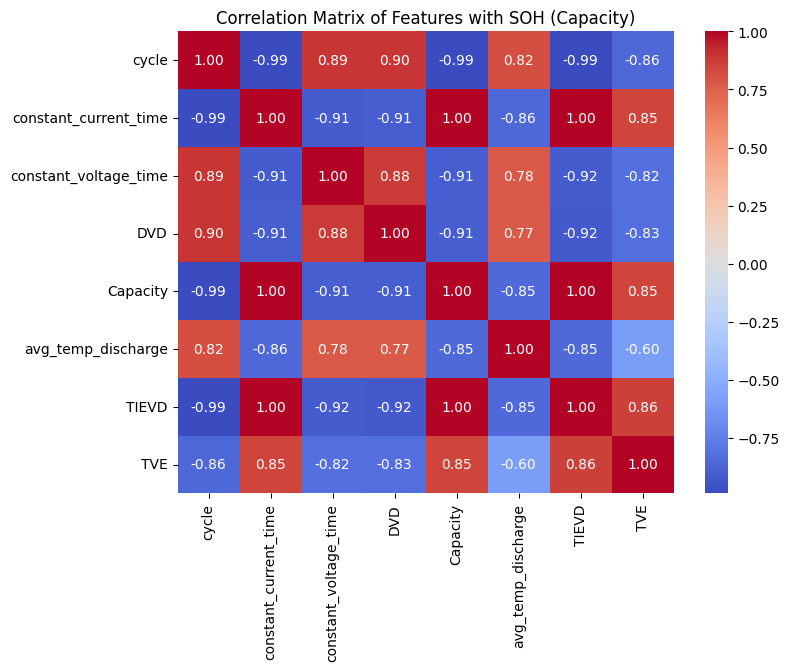

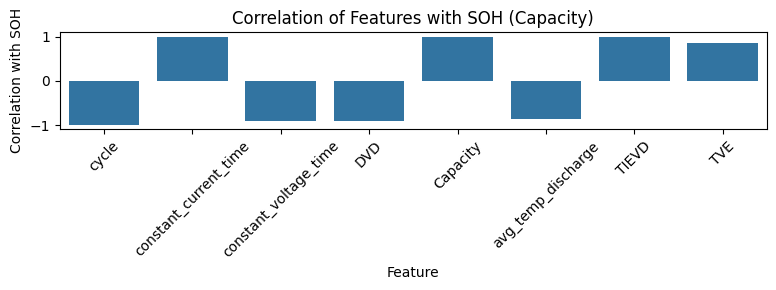

In [19]:
import pandas as pd

# Assuming 'filtered_df' is your DataFrame that includes the 'Capacity' column among others

# Generate the correlation matrix
corr_matrix = filtered_df.corr()

# Extract the correlations with SOH, assuming SOH is represented by 'Capacity'
soh_correlations = corr_matrix['Capacity']

# If you want to display the SOH correlations as a DataFrame
soh_correlations_df = pd.DataFrame(soh_correlations).reset_index()
soh_correlations_df.columns = ['Feature', 'Correlation with SOH']

# Display the correlations with SOH
print(soh_correlations_df)

# Optionally, for a more visual representation, consider using matplotlib or seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlations as a heatmap
plt.figure(figsize=(8, 6))  # You can adjust the figure size to your preference
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features with SOH (Capacity)')
plt.show()

# To specifically highlight the SOH correlations visually:
plt.figure(figsize=(8, 3))  # Adjust size as needed
sns.barplot(x='Feature', y='Correlation with SOH', data=soh_correlations_df)
plt.title('Correlation of Features with SOH (Capacity)')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

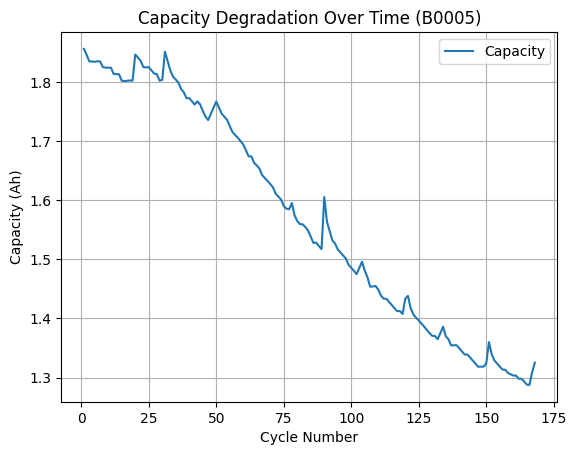

In [20]:
import matplotlib.pyplot as plt

filtered_df.plot(x='cycle', y='Capacity', kind='line')
plt.title('Capacity Degradation Over Time (B0005)')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.grid(True)
plt.show()

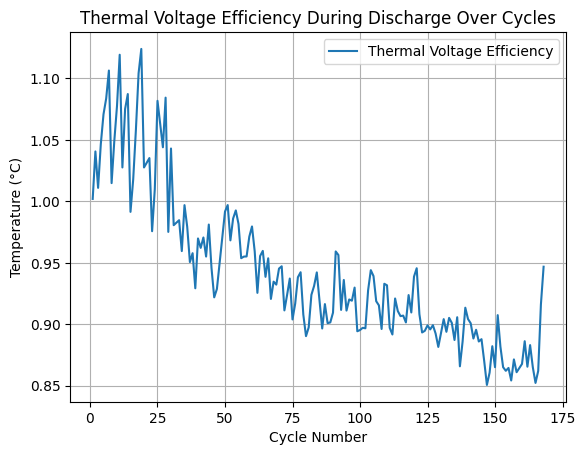

In [21]:
filtered_df.plot(x='cycle', y='TVE', kind='line', label='Thermal Voltage Efficiency', ax=plt.gca())
plt.title('Thermal Voltage Efficiency During Discharge Over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


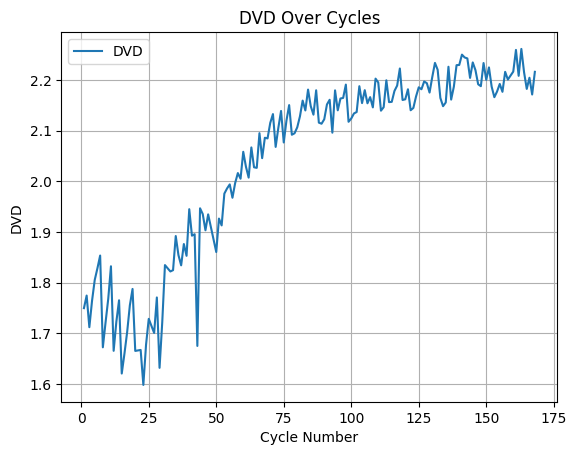

In [22]:
filtered_df.plot(x='cycle', y='DVD', kind='line')
plt.title('DVD Over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('DVD')
plt.grid(True)
plt.show()


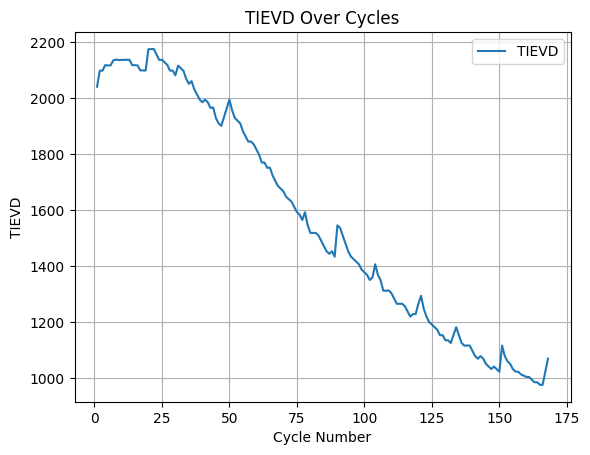

In [23]:
filtered_df.plot(x='cycle', y='TIEVD', kind='line')
plt.title('TIEVD Over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('TIEVD')
plt.grid(True)
plt.show()

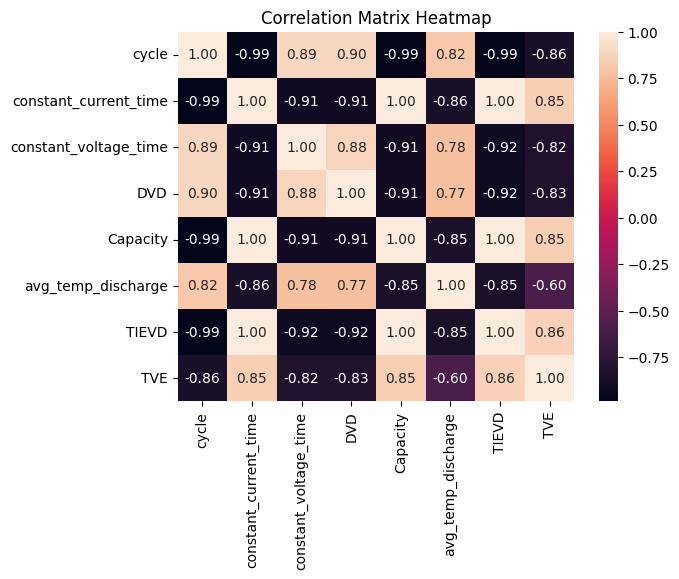

In [24]:
import seaborn as sns

# Compute the correlation matrix
corr = filtered_df.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [28]:
df1 = pd.read_csv('/Users/jaypalamand/Desktop/ME597/TransformedData/B0006_results.csv')
df2 = pd.read_csv('/Users/jaypalamand/Desktop/ME597/TransformedData/B0018_results.csv')

# Concatenate the dataframes along rows (axis=0)
concatenated_df = pd.concat([df1, df2])

# Reset index if needed
concatenated_df.reset_index(drop=True, inplace=True)

In [127]:
# import pandas as pd
# from matplotlib import pyplot as plt
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# def train_and_visualize(X, y, train_size):
#     # Splitting the dataset based on the specified training size
#     train_len = int(len(X) * train_size)
#     X_train_raw, X_test_raw = X[:train_len], X[train_len:]
#     y_train, y_test = y[:train_len], y[train_len:]

#     # Data scaling
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train_raw)
#     X_test_scaled = scaler.transform(X_test_raw)

#     # Applying PCA
#     pca = PCA(n_components=0.95)  # retain 95% of the variance
#     X_train = pca.fit_transform(X_train_scaled)
#     X_test = pca.transform(X_test_scaled)

#     # Dictionary of models
#     models = {
#         'Decision Tree': DecisionTreeRegressor(),
#         'Linear Regression': LinearRegression(),
#         'Random Forest': RandomForestRegressor(),
#         'Gradient Boosting': GradientBoostingRegressor(),
#         'SVR': SVR()
#     }

#     fig, ax = plt.subplots(figsize=(10, 6))

#     # Train and predict using each model
#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         # Calculate and print the metrics
#         mse = mean_squared_error(y_test, y_pred)
#         r2 = r2_score(y_test, y_pred)
#         print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

#         # Plotting actual vs predicted values
#         ax.plot(range(len(y_test)), y_pred, label=f'{name} Predicted')
    
#     # Plotting the actual values
#     ax.plot(range(len(y_test)), y_test, label='Actual', color='black', lw=2)
    
#     ax.set_title(f'Actual vs. Predicted Values (Train Size: {train_size * 100}%)')
#     ax.set_xlabel('Index')
#     ax.set_ylabel('Capacity')
#     ax.legend()
#     plt.show()


In [29]:
concatenated_df

,cycle,constant_current_time,constant_voltage_time,avg_temp_charge,DVD,Capacity,avg_temp_discharge,TIEVD,TVE
0,1,3608.812,6907.188,27.097750,1.561079,2.035338,32.142778,2211.516,1.072571
1,2,3617.391,6867.156,27.243310,1.657018,2.025140,32.293075,2269.328,1.174243
2,3,3570.687,6827.203,27.173139,1.571059,2.013326,32.244147,2269.609,1.134609
3,4,3544.828,6950.375,27.058182,1.537829,2.013285,32.147117,2269.953,1.112877
4,5,3547.000,7245.672,27.010665,1.708139,2.000528,32.066873,2268.875,1.234445
...,...,...,...,...,...,...,...,...,...
295,128,1928.031,8169.813,25.127355,2.321941,1.362737,31.818465,1104.532,1.127844
296,129,1933.907,8149.109,25.659479,2.201161,1.363405,32.000672,1104.641,1.065568
297,130,1928.922,8161.891,26.045549,2.288223,1.351865,31.739922,1066.969,1.088500
298,131,1907.250,8023.015,26.002153,2.391289,1.354797,31.526136,1069.782,1.153682


In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Example function to load and prepare your data
def load_and_prepare_data(df):
    features = df[['cycle', 'constant_current_time', 'constant_voltage_time', 'DVD', 'avg_temp_discharge', 'TIEVD', 'TVE']]
    target = df['Capacity']
    return features, target

# Load full degradation data
X_full, y_full = load_and_prepare_data(concatenated_df)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Reshape input for traditional models [samples, features]
X_flat = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1]))

# Model definition
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

# Define hyperparameters grid for each model
param_grids = {
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Linear Regression': {},  # No hyperparameters to tune for Linear Regression
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5]},
}
best_models = {} 
# Perform grid search for each model
for name, model in models.items():
    print("Tuning hyperparameters for", name)
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_scaled, y_full)
    best_models[name] = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)
    print("Best MSE:", -grid_search.best_score_)

Tuning hyperparameters for Decision Tree
Best parameters: {'max_depth': 20}
Best MSE: 0.009029931911315887
Tuning hyperparameters for Linear Regression
Best parameters: {}
Best MSE: 0.00140683910578317
Tuning hyperparameters for Random Forest
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best MSE: 0.009271765221409736
Tuning hyperparameters for Gradient Boosting
Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best MSE: 0.008578003163527782


In [58]:
test_df = pd.read_csv('/Users/jaypalamand/Desktop/ME597/TransformedData/B0005_results.csv')

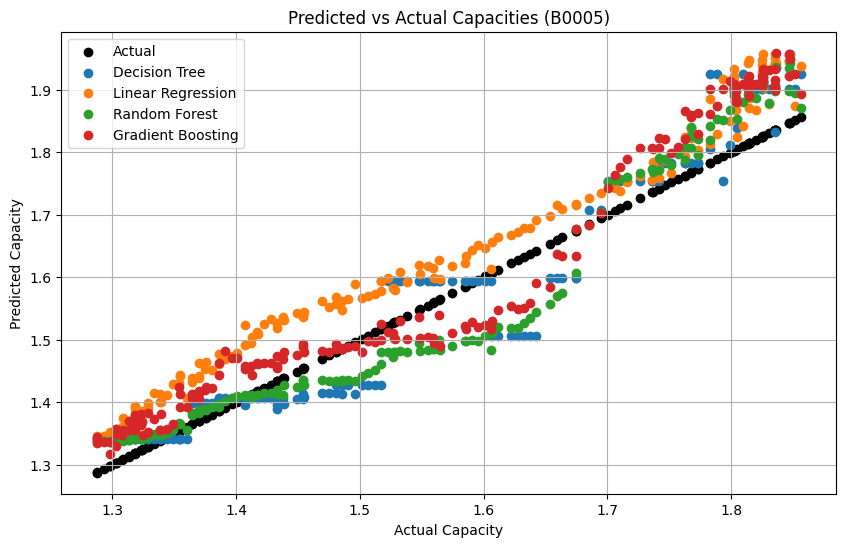

In [60]:
# Prepare and scale new battery data
X_new, y_new = load_and_prepare_data(test_df)
X_new_scaled = scaler.transform(X_new)

# Predict on new battery data and evaluate models
plt.figure(figsize=(10, 6))
plt.scatter(y_new, y_new, color='k', label='Actual')  # Plot actual values as reference

for name, best_model in best_models.items():  # Iterate over best models
    predictions = best_model.predict(X_new_scaled)
    plt.scatter(y_new, predictions, label=name)

plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Predicted vs Actual Capacities (B0005)')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize lists to store error statistics
mse_list = []
rmse_list = []
mae_list = []

# Calculate error statistics for each best model
for name, best_model in best_models.items():  # Iterate over the best models
    predictions = best_model.predict(X_new_scaled)
    mse = mean_squared_error(y_new, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_new, predictions)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)

# Create a dataframe to display error statistics
error_df = pd.DataFrame({
    'Model': list(best_models.keys()),  # Use the best models dictionary keys
    'MSE': mse_list,
    'RMSE': rmse_list,
    'MAE': mae_list
})

# Apply formatting for better readability
styled_error_df = error_df.style.format({
    'MSE': "{:.4f}",
    'RMSE': "{:.4f}",
    'MAE': "{:.4f}"
}).set_properties(**{'text-align': 'center'}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#F4F4F4C5'), ('color', 'black')]
}]).set_caption("Error Statistics")

# Display the styled dataframe
styled_error_df


,Model,MSE,RMSE,MAE
0,Decision Tree,0.0035,0.0593,0.0484
1,Linear Regression,0.0055,0.0740,0.0690
2,Random Forest,0.0033,0.0570,0.0480
3,Gradient Boosting,0.0040,0.0635,0.0559


In [ ]:
# Mean Squared Error (MSE): 0.0024645037727117256
# Mean Absolute Error (MAE): 0.044510364267641316
# Root Mean Squared Error (RMSE): 0.04964376871986781

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Assuming df1 and df2 are your training battery DataFrames, and df3 is your testing battery DataFrame
df1 = pd.read_csv('/Users/jaypalamand/Desktop/ME597/TransformedData/B0005_results.csv')
df2 = pd.read_csv('/Users/jaypalamand/Desktop/ME597/TransformedData/B0006_results.csv')
df3 = pd.read_csv('/Users/jaypalamand/Desktop/ME597/TransformedData/B0007_results.csv')
df4 = pd.read_csv('/Users/jaypalamand/Desktop/ME597/TransformedData/B0018_results.csv')

def normalize_dataframe(df):
    scaler = StandardScaler()
    features = df.drop(['Capacity'], axis=1)
    df_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    df_normalized['Capacity'] = df['Capacity'].values  # Keeping Capacity in the last column
    return df_normalized

# Normalize each DataFrame
df1_normalized = normalize_dataframe(df1)
df2_normalized = normalize_dataframe(df2)
df3_normalized = normalize_dataframe(df3)
df4_normalized = normalize_dataframe(df4)

def create_sequences(df, sequence_length):
    sequences = []
    labels = []
    for i in range(len(df) - sequence_length):
        seq = df.iloc[i:i+sequence_length, :-1].values  # Exclude the last column (Capacity)
        label = df.iloc[i+sequence_length, -1]  # Last column value (Capacity) of the last row of the sequence
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 10  # Example sequence length
X_train_1, y_train_1 = create_sequences(df2_normalized, sequence_length)
X_train_2, y_train_2 = create_sequences(df4_normalized, sequence_length)

# Training Data: Use B0006 and B0018
X_train = np.concatenate((X_train_1, X_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

# Validation Data: Use B0007
X_val, y_val = create_sequences(df3_normalized, sequence_length)

# Testing Data: Use B0005
X_test, y_test = create_sequences(df1_normalized, sequence_length)

# TensorFlow requires the labels to be of a certain shape for the Sequential API
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Create TensorFlow Dataset objects for training, validation, and testing
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64).shuffle(buffer_size=len(X_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)



In [65]:
df1_normalized = normalize_dataframe(df1)
df2_normalized = normalize_dataframe(df2)
df3_normalized = normalize_dataframe(df3)
df4_normalized = normalize_dataframe(df4)

X_test1, y_test1 = create_sequences(df1_normalized, sequence_length)
X_test2, y_test2 = create_sequences(df2_normalized, sequence_length)
X_test3, y_test3 = create_sequences(df3_normalized, sequence_length)
X_test4, y_test4 = create_sequences(df4_normalized, sequence_length)

test_dataset1 = tf.data.Dataset.from_tensor_slices((X_test1, y_test1)).batch(64)
test_dataset2 = tf.data.Dataset.from_tensor_slices((X_test2, y_test2)).batch(64)
test_dataset3 = tf.data.Dataset.from_tensor_slices((X_test3, y_test3)).batch(64)
test_dataset4 = tf.data.Dataset.from_tensor_slices((X_test4, y_test4)).batch(64)

In [32]:
train_dataset

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 10, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [240]:
del history1, model1


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

learning_rate = 0.009
lstm_units = 128
dropout_rate = 0.1

model1 = Sequential([
    LSTM(lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(dropout_rate),  # Adding dropout to combat overfitting
    Dense(1)
])

adam_optimizer = Adam(learning_rate=learning_rate)
model1.compile(optimizer=adam_optimizer, loss='mse', metrics=['mae'])


# Summary of the model to see its architecture
model1.summary()

/Users/jaypalamand/Desktop/ME597/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,273 (274.50 KB)

 Trainable params: 70,273 (274.50 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
del history2, model2

In [3]:
history1 = model1.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
)

Epoch 1/100


In [54]:
from tensorflow.keras.layers import Flatten

model2 = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(256, activation='relu'),
    Dropout(dropout_rate),
    Dense(1)
])
model2.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
model2.summary()

history2 = model2.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
    verbose = 1
)

model1.save('/Users/jaypalamand/Desktop/ME597/DeepLearningModels/ANN_model.h5')


/Users/jaypalamand/Desktop/ME597/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,993 (82.00 KB)

 Trainable params: 20,993 (82.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.1668 - mae: 3.2811 - val_loss: 25.7234 - val_mae: 4.4567
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.5954 - mae: 4.1466 - val_loss: 2.0982 - val_mae: 1.1960
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4368 - mae: 1.5996 - val_loss: 1.2549 - val_mae: 0.9258
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8656 - mae: 1.2454 - val_loss: 5.4523 - val_mae: 2.1222
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6124 - mae: 1.9878 - val_loss: 1.1935 - val_mae: 0.9987
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5578 - mae: 1.1219 - val_loss: 2.3350 - val_mae: 1.2745
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0508 - mae: 0.8403 - val_loss: 0.5091 - val_mae: 0.6209
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6969 - mae: 0.7025 - val_loss: 1.2809 - val_mae: 1.0210
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2433 - mae: 0.947

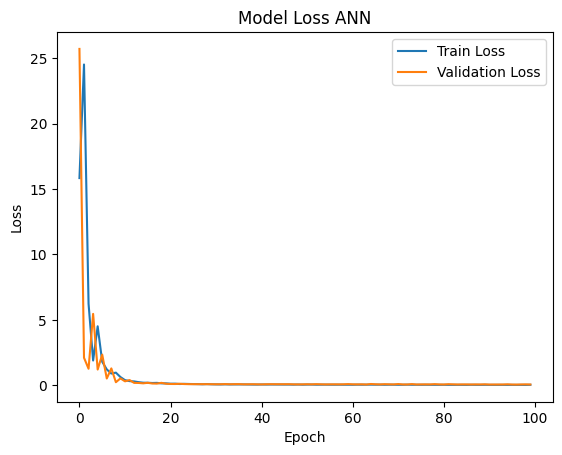

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss ANN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

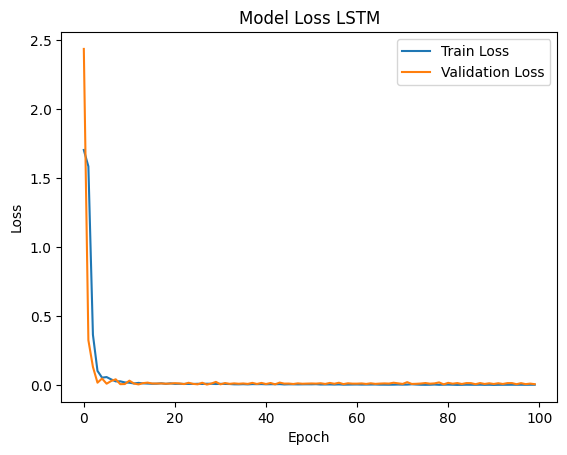

In [56]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [5]:
import matplotlib.pyplot as plt

def custom_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

model1 = tf.keras.models.load_model('DeepLearningModels/LSTM_model.h5', custom_objects={'mse': custom_mse})

# Predicting on the test set
predictions = model1.predict(test_dataset).flatten()

# Assuming y_test is your actual test labels prepared earlier
actual = y_test.flatten()

plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.scatter(actual, predictions, alpha=0.6, label='Predicted vs. Actual')
plt.title('Actual vs. Predicted Battery Capacity (B0005)')
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'r', label='Perfect Prediction')
plt.legend()  # This adds the legend to the plot
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.show()

AttributeError: module 'keras._tf_keras.keras.metrics' has no attribute 'mean_squared_error'

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'predictions' and 'actual' are already defined as your model's output and the true values respectively

# Calculate error metrics
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Print the error metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.0019744445043208946
Mean Absolute Error (MAE): 0.034267731629063485
Root Mean Squared Error (RMSE): 0.044434721832378954


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step


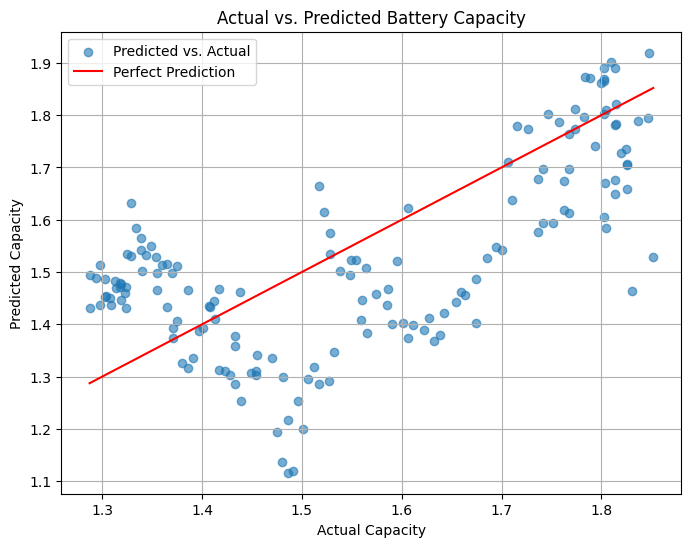

In [61]:
import matplotlib.pyplot as plt

# Predicting on the test set
predictions = model2.predict(test_dataset).flatten()

# Assuming y_test is your actual test labels prepared earlier
actual = y_test.flatten()

plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.scatter(actual, predictions, alpha=0.6, label='Predicted vs. Actual')
plt.title('Actual vs. Predicted Battery Capacity')
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'r', label='Perfect Prediction')
plt.legend()  # This adds the legend to the plot
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'predictions' and 'actual' are already defined as your model's output and the true values respectively

# Calculate error metrics
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Print the error metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.024367332665282182
Mean Absolute Error (MAE): 0.1314669661406354
Root Mean Squared Error (RMSE): 0.15610039290559835


In [68]:
predictionsB0005 = model1.predict(test_dataset1).flatten()
predictionsB0006 = model1.predict(test_dataset2).flatten()
predictionsB0007 = model1.predict(test_dataset3).flatten()
predictionsB0018 = model1.predict(test_dataset4).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [70]:
import pandas as pd

# Base path for the original data
base_path = '/Users/jaypalamand/Desktop/ME597/Data/'

# Batteries list
batteries = ['B0005', 'B0006', 'B0007', 'B0018']
predictions_list = [predictionsB0005, predictionsB0006, predictionsB0007, predictionsB0018]

# Iterate over each battery and its corresponding predictions
for battery, predictions in zip(batteries, predictions_list):
    # Load the charge and discharge data
    charge_df = pd.read_csv(f'{base_path}{battery}_charge.csv')
    discharge_df = pd.read_csv(f'{base_path}{battery}_discharge.csv')
    
    # Get the initial capacity from the first cycle in the charge DataFrame
    initial_capacity = charge_df.loc[charge_df['cycle'] == charge_df['cycle'].min(), 'capacity'].iloc[0]
    
    # Assuming cycle numbers and predictions align and predictions length matches the unique cycles in data
    # Create a dictionary to map cycle number to the predicted SOH as a percentage of initial capacity
    unique_cycles = sorted(charge_df['cycle'].unique())  # Assuming cycles are numbered consecutively and start from 1
    soh_map = {cycle: (capacity / initial_capacity) * 100 for cycle, capacity in zip(unique_cycles, predictions)}
    
    # Assign SOH values to charge and discharge dataframes
    charge_df['SOH'] = charge_df['cycle'].map(soh_map)
    discharge_df['SOH'] = discharge_df['cycle'].map(soh_map)
    
    # Save the updated DataFrames
    charge_df.to_csv(f'{base_path}{battery}_charge_with_SOH.csv', index=False)
    discharge_df.to_csv(f'{base_path}{battery}_discharge_with_SOH.csv', index=False)
